<a href="https://colab.research.google.com/github/nrooney99/analisis-subtes-CABA/blob/main/TP_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalo geopandas y cargo las bases de datos

In [ ]:
% pip install geopandas

In [ ]:

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

barriosUrl="https://cdn.buenosaires.gob.ar/datosabiertos/datasets/barrios/barrios.geojson"
lineasUrl="https://cdn.buenosaires.gob.ar/datosabiertos/datasets/sbase/subte-estaciones/subte_lineas.geojson"
estacionesUrl="https://cdn.buenosaires.gob.ar/datosabiertos/datasets/sbase/subte-estaciones/estaciones-de-subte.geojson"

map_barrios = gpd.read_file(barriosUrl)
map_lineas = gpd.read_file(lineasUrl)
map_estaciones = gpd.read_file(estacionesUrl)

actividad=pd.read_csv('/content/drive/MyDrive/historico_2021.csv')

In [ ]:
actividad.columns

Index(['Unnamed: 0', 'periodo', 'FECHA', 'DESDE', 'HASTA', 'LINEA', 'MOLINETE',
       'ESTACION', 'pax_pagos', 'pax_pases_pagos', 'pax_franq', 'pax_TOTAL'],
      dtype='object')

#Corrección de fecha

In [ ]:
actividad['FECHA']

In [ ]:
pd.unique(actividad['FECHA'])

In [ ]:
for i in range(1,10):
   actividad['FECHA']=actividad['FECHA'].replace('2021-0'+str(i)+ '-02',str(i)+'/2/2021')
for i in range(10,13):
   actividad['FECHA']=actividad['FECHA'].replace('2021-'+str(i)+ '-02',str(i)+'/2/2021')
for i in range(13,29):
  actividad['FECHA']=actividad['FECHA'].replace('2021-02-'+str(i),str(i)+'/2/2021')
for i in range(1,10):
  actividad['FECHA']=actividad['FECHA'].replace('2021-0'+str(i)+ '-03',str(i)+'/3/2021')
for i in range(10,13):
  actividad['FECHA']=actividad['FECHA'].replace('2021-'+str(i)+ '-03',str(i)+'/3/2021')
for i in range(13,32):
  actividad['FECHA']=actividad['FECHA'].replace('2021-03-'+str(i),str(i)+'/3/2021')

In [ ]:
actividad.to_csv('/content/drive/MyDrive/historico_2021.csv')

#Corrección de Estaciones

In [ ]:
actividad['ESTACION']

In [ ]:
pd.unique(actividad['ESTACION'])

array(['Flores', 'San Pedrito', 'Leandro N. Alem', 'Rosas', 'Malabia',
       'Carlos Pellegrini', 'Pueyrredon', 'Independencia', 'Retiro',
       'Plaza Miserere', 'Callao.B', 'Medrano', 'Castro Barros', 'Peru',
       'Dorrego', 'Federico Lacroze', 'Lima', 'Acoyte', 'Angel Gallardo',
       'Congreso', 'Primera Junta', 'Los Incas', 'Constitucion',
       'Avenida de Mayo', 'Diagonal Norte', 'Congreso de Tucuman',
       'Olleros', 'Plaza Italia', 'Independencia.H',
       'Pza. de los Virreyes', 'Facultad de Derecho', 'Catedral',
       'Juramento', 'Retiro E', 'Caseros', 'Once', '9 de julio',
       'Bolivar', 'Emilio Mitre', 'Jujuy', 'Hospitales', 'Santa Fe',
       'Bulnes', 'Facultad de Medicina', 'Correo Central',
       'Ministro Carranza', 'Palermo', 'Pueyrredon.D', 'Entre Rios',
       'Patricios', 'Callao', 'Corrientes', 'Humberto I',
       'Avenida La Plata', 'Boedo', 'Pasco', 'Alberti', 'Tronador',
       'Jose Hernandez', 'Venezuela', 'Carlos Gardel', 'Echeverria',
     

In [ ]:
actividad['ESTACION']=actividad['ESTACION'].replace('Saenz Pe�a','Saenz Pena').replace('Saenz Pe±a ','Saenz Pena').replace('Saenz Pe¤a ','Saenz Pena').replace('Saenz Peña ','Saenz Pena').replace('Ag³ero','Aguero').replace('Ag�ero','Aguero').replace('Ag\x81ero','Aguero').replace('Agüero','Aguero')

#Gráfico

In [ ]:
habitantes=pd.DataFrame({'BARRIO':['MONTE CASTRO', 'VILLA REAL', 'PARQUE CHAS', 'BALVANERA', 'BELGRANO', 'RECOLETA', 'SAN TELMO', 'NUEVA POMPEYA', 'SAN NICOLAS', 'PUERTO MADERO', 'PALERMO', 'FLORES', 'SAN CRISTOBAL', 'VILLA DEVOTO', 'MONSERRAT', 'VILLA SANTA RITA', 'VILLA URQUIZA', 'ALMAGRO', 'VILLA GRAL. MITRE', 'VILLA DEL PARQUE', 'CHACARITA', 'FLORESTA', 'COGHLAN', 'VILLA PUEYRREDON', 'VELEZ SARSFIELD', 'COLEGIALES', 'PARQUE AVELLANEDA', 'SAAVEDRA', 'CABALLITO', 'VILLA CRESPO', 'PATERNAL', 'BOEDO', 'PARQUE PATRICIOS', 'AGRONOMIA', 'VILLA ORTUZAR', 'RETIRO', 'PARQUE CHACABUCO', 'VILLA LURO', 'NUÑEZ', 'CONSTITUCION', 'LINIERS', 'VILLA LUGANO', 'BARRACAS', 'VILLA RIACHUELO', 'MATADEROS', 'BOCA', 'VILLA SOLDATI', 'VERSALLES'],
                         'HABITANTES':[33746, 13461, 17582, 139148, 126837, 158651, 20228, 42234, 29506, 6739, 225858, 164178, 48643, 66561, 40366, 33081, 92325, 132022, 34932, 55087, 27574, 37437, 18727, 39667, 35119, 21542, 53208, 50125, 176572, 81808, 19724, 47359, 40965, 13899, 21540, 65423, 56250, 32573, 52493, 43975, 44203, 126516, 89521, 14053, 64257, 44883, 46729, 13879]
                         })
map_barrios=map_barrios.merge(habitantes, on='BARRIO',how='outer')

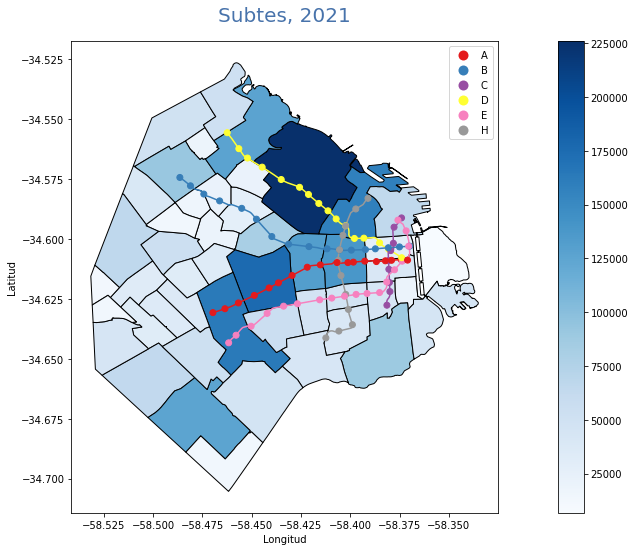

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Subtes, 2021', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Mostrar el mapa finalizado
map_lineas.plot(column='LINEASUB', cmap='Set1', ax=ax, zorder=5)
map_barrios.plot(column='HABITANTES', cmap='Blues', ax=ax , cax=cax, legend=True, zorder=4, edgecolor='black')
map_estaciones.plot(column='LINEA', cmap='Set1', ax=ax , legend=True , zorder=6)